<center>

# **TTC STREETCAR DELAY - DESCRIPTIVE STATISTICS & DATA VISUALIZATION** 



  - **Purpose**: The visualizations are conducted to gain deeper insights from the TTC streetcar delay data. 
  
  - **Histogram & Pie Chart**:
    - To illustrate the **distribution of delay types** (`Short Delay`, `Expected Delay`, and `Long Delay`) in the TTC StreetCar Delay (01/2023 to 09/2024)dataset.

  - **Heatmaps & Bar Charts**:
    - To explore the **distribution of delay types** across various features such as `incident`, `vehicle`, `line`, and `location`. 
    - To visualize which categories are more prone to different types of delays, providing insights for further targeted analysis.
    - To visualize the **most dominant values** within each feature category for the 'Normal Delay Type'** (6-15 minutes). 
    
  - **Conclusion**: 
    - To summarize insights and recommendations for TTC for strategic pre-emptive actions. 


In [1]:
# Import necessary libraries for this notebook: 

# Read from SQLite database and load to a pandas dataframe
import os
import sqlite3
import pandas as pd

# For using arrays 
import numpy as np


# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic




In [2]:
# Load the saved df_prelim parquet file: 
relative_path = os.path.join("..", "data", "df_prelim.parquet")
df = pd.read_parquet(relative_path)


In [3]:
# Convert incident_time to datetime
df['incident_time'] = pd.to_datetime(df['incident_time'], format='%H:%M').dt.time

# Define function to categorize time
def categorize_time(time):
    if time >= pd.to_datetime('06:30').time() and time <= pd.to_datetime('09:30').time():
        return 1
    elif time >= pd.to_datetime('10:00').time() and time <= pd.to_datetime('14:00').time():
        return 2
    elif time >= pd.to_datetime('16:30').time() and time <= pd.to_datetime('19:00').time():
        return 3
    else:
        return 4

# Apply function to create new column "timeType"
df['timeType'] = df['incident_time'].apply(categorize_time)


# Clean and factorize columns: location, bound, incident, vehicle, day_of_week
# Define a helper function
def clean_and_factorize(df, column_name, valid_values=None):
    # Remove leading and trailing spaces
    df[column_name] = df[column_name].str.strip()
    
    # Drop null values
    df = df.dropna(subset=[column_name])
    
    # If valid values are provided, filter the dataframe
    if valid_values:
        df = df[df[column_name].isin(valid_values)]
    
    # Assign unique numeric values
    df[f"{column_name}_id"] = pd.factorize(df[column_name])[0] + 1
    
    return df

# Apply the function to each column
df = clean_and_factorize(df, 'location')
df = clean_and_factorize(df, 'incident')
df = clean_and_factorize(df, 'vehicle')
df = clean_and_factorize(df, 'day_of_week')
df = clean_and_factorize(df, 'line')
df = clean_and_factorize(df, 'bound', valid_values=['N', 'S', 'W', 'E'])


# Display the DataFrame
df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_25008\714986131.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column_name}_id"] = pd.factorize(df[column_name])[0] + 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_25008\714986131.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column_name}_id"] = pd.factorize(df[column_name])[0] + 1


,incident_date,line,incident_time,day_of_week,location,incident,min_delay,min_gap,bound,vehicle,...,lineId,lineName,delayType,timeType,location_id,incident_id,vehicle_id,day_of_week_id,line_id,bound_id
0,2023-01-01,505,02:40:00,Sunday,BROADVIEW AND GERRARD,Held By,15,25,W,4460,...,505,Dundas,2,4,1,1,1,1,1,1
1,2023-01-01,504,02:52:00,Sunday,KING AND BATHURST,Cleaning - Unsanitary,10,20,W,4427,...,504,King,2,4,2,2,2,1,2,1
2,2023-01-01,504,02:59:00,Sunday,KING AND BATHURST,Held By,25,35,E,4560,...,504,King,3,4,2,1,3,1,2,2
3,2023-01-01,510,05:38:00,Sunday,SPADINA AND DUNDAS,Security,15,30,S,4449,...,510,Spadina,2,4,3,3,4,1,3,3
5,2023-01-01,501,08:52:00,Sunday,LAKE SHORE AND THIRTY,Cleaning - Unsanitary,10,20,W,8015,...,501,Queen,2,1,5,2,6,1,5,1


In [4]:
# Verify that there are 4 'bound' unique values: 
df.nunique()

incident_date      639
line                42
incident_time     1438
day_of_week          7
location          2936
incident            14
min_delay          246
min_gap            268
bound                4
vehicle           1537
holidayType          9
seasonType           8
lineId              17
lineName            12
delayType            3
timeType             4
location_id       2936
incident_id         14
vehicle_id        1537
day_of_week_id       7
line_id             42
bound_id             4
dtype: int64

In [5]:
# Verify that the NULL objects have been dropped. 
null_counts = df.isnull().sum()
print(null_counts)

incident_date         0
line                  0
incident_time         0
day_of_week           0
location              0
incident              0
min_delay             0
min_gap               0
bound                 0
vehicle               0
holidayType       18646
seasonType            0
lineId               98
lineName             98
delayType             0
timeType              0
location_id           0
incident_id           0
vehicle_id            0
day_of_week_id        0
line_id               0
bound_id              0
dtype: int64


In [6]:
# Drop null values in 'lineId'
df = df.dropna(subset=['lineId', 'lineName'])

# Drop the following columns: incident_date, incident_time, min_gap, isEndOfMth, lineID. min_delay
df_cleaned = df.drop(['incident_date','incident_time', 'min_gap', 'lineId'], axis=1)

# Verify the columns are dropped
df_cleaned.head()

,line,day_of_week,location,incident,min_delay,bound,vehicle,holidayType,seasonType,lineName,delayType,timeType,location_id,incident_id,vehicle_id,day_of_week_id,line_id,bound_id
0,505,Sunday,BROADVIEW AND GERRARD,Held By,15,W,4460,New Year's Day,Winter 2023,Dundas,2,4,1,1,1,1,1,1
1,504,Sunday,KING AND BATHURST,Cleaning - Unsanitary,10,W,4427,New Year's Day,Winter 2023,King,2,4,2,2,2,1,2,1
2,504,Sunday,KING AND BATHURST,Held By,25,E,4560,New Year's Day,Winter 2023,King,3,4,2,1,3,1,2,2
3,510,Sunday,SPADINA AND DUNDAS,Security,15,S,4449,New Year's Day,Winter 2023,Spadina,2,4,3,3,4,1,3,3
5,501,Sunday,LAKE SHORE AND THIRTY,Cleaning - Unsanitary,10,W,8015,New Year's Day,Winter 2023,Queen,2,1,5,2,6,1,5,1


In [7]:
# Verify that the NULL objects have been dropped. 
null_counts = df_cleaned.isnull().sum()
print(null_counts)

line                  0
day_of_week           0
location              0
incident              0
min_delay             0
bound                 0
vehicle               0
holidayType       18549
seasonType            0
lineName              0
delayType             0
timeType              0
location_id           0
incident_id           0
vehicle_id            0
day_of_week_id        0
line_id               0
bound_id              0
dtype: int64


In [8]:
# Reviewing the data types and counts to make sure everything looks okay.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18985 entries, 0 to 21741
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   line            18985 non-null  object
 1   day_of_week     18985 non-null  object
 2   location        18985 non-null  object
 3   incident        18985 non-null  object
 4   min_delay       18985 non-null  int64 
 5   bound           18985 non-null  object
 6   vehicle         18985 non-null  object
 7   holidayType     436 non-null    object
 8   seasonType      18985 non-null  object
 9   lineName        18985 non-null  object
 10  delayType       18985 non-null  int64 
 11  timeType        18985 non-null  int64 
 12  location_id     18985 non-null  int64 
 13  incident_id     18985 non-null  int64 
 14  vehicle_id      18985 non-null  int64 
 15  day_of_week_id  18985 non-null  int64 
 16  line_id         18985 non-null  int64 
 17  bound_id        18985 non-null  int64 
dtypes: int64(9)

In [9]:
# Reviewing the dataframe to make sure everything looks okay. 
df_cleaned.describe()

,min_delay,delayType,timeType,location_id,incident_id,vehicle_id,day_of_week_id,line_id,bound_id
count,18985.000000,18985.000000,18985.000000,18985.000000,18985.000000,18985.000000,18985.000000,18985.000000,18985.000000
mean,17.630866,2.122518,3.136740,565.728681,5.542586,336.417540,4.083382,4.838451,1.998209
std,35.662549,0.558853,1.091452,724.567600,2.967444,354.170873,1.990509,4.400008,1.003784
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.000000,2.000000,2.000000,90.000000,3.000000,98.000000,2.000000,2.000000,1.000000
50%,10.000000,2.000000,4.000000,247.000000,5.000000,209.000000,4.000000,4.000000,2.000000
75%,14.000000,2.000000,4.000000,703.000000,8.000000,402.000000,6.000000,5.000000,3.000000
max,960.000000,3.000000,4.000000,3197.000000,14.000000,1578.000000,7.000000,41.000000,4.000000


In [10]:
# Check the distribution of delayType
print(df_cleaned['delayType'].value_counts())

delayType
2    12771
3     4270
1     1944
Name: count, dtype: int64


In [12]:
# Save df as csv file in 'data' folder
relative_path = os.path.join("..", "data", "df_factorized.csv")
df_cleaned.to_csv(relative_path, index=False)


---
<center>

# **Data Distribution**

</center>

<center>

## **Delay Types - Distributions**

</center>



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



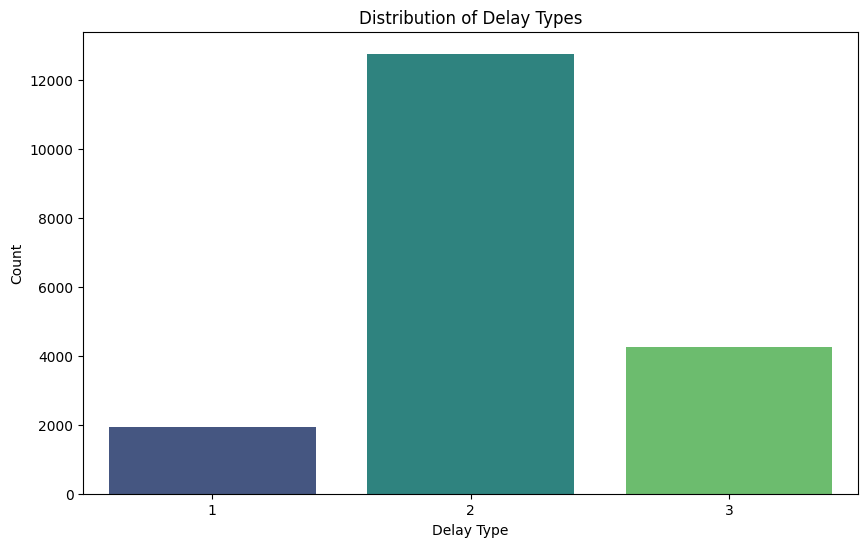

In [ ]:
# Histogram
delay_type_counts = df_cleaned['delayType'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_type_counts.index, y=delay_type_counts.values, palette='viridis')
plt.title('Distribution of Delay Types')
plt.xlabel('Delay Type')
plt.ylabel('Count')
plt.show()



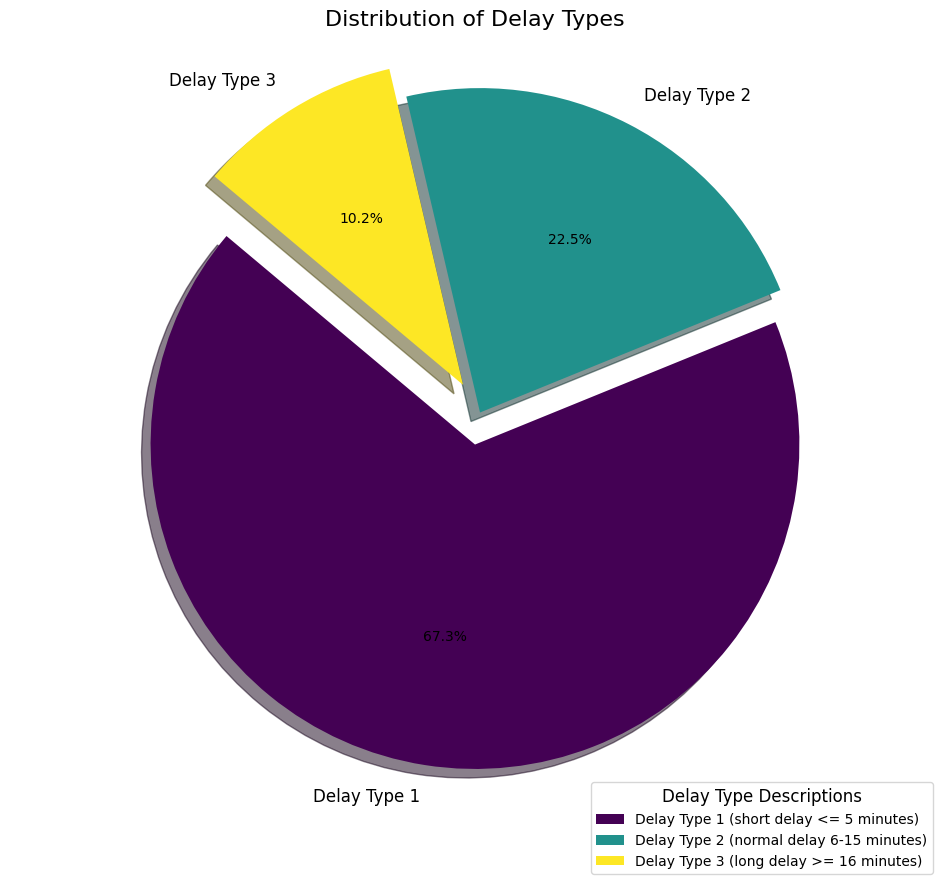

In [ ]:
# Add labels with descriptions
labels = [
    "Delay Type 1", 
    "Delay Type 2", 
    "Delay Type 3"
]

# Set sizes
sizes = delay_type_counts.copy()

# Use the Viridis color palette for accessibility
colors = plt.cm.viridis(np.linspace(0, 1, len(sizes)))

# Create the pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,  # Explicitly specify labels
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    explode=(0.1, 0, 0.1)  # Add space for Delay Types 1 and 3
)

# Set font size for probability values (autotexts) and labels (texts)
plt.setp(autotexts, size=10)  # Font size and style for percentage values
plt.setp(texts, size=12)  # Font size and style for class labels

# Add legend with descriptions
legend_labels = [
    "Delay Type 1 (short delay <= 5 minutes)", 
    "Delay Type 2 (normal delay 6-15 minutes)", 
    "Delay Type 3 (long delay >= 16 minutes)"
]
plt.legend(
    wedges, 
    legend_labels, 
    title="Delay Type Descriptions", 
    loc="lower right", 
    bbox_to_anchor=(1, -0.1),
    fontsize=10,
    title_fontsize=12
)

# Add chart title and aesthetics
plt.title('Distribution of Delay Types', fontsize=16)
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()


**Interpretation**

- Expected Delay Time (6-15 minutes): This category dominates the dataset, accounting for 67% of all delays. This indicates that most delays fall within the expected range of 6 to 15 minutes.
- Long Delay Time (> 15 minutes): This category makes up 23% of the delays. Since this is the most disruptive delay type with many delays going as far as beyond 600 minutes, 23% is still a significant portion that would need a separate case study for targeted strategies. 
- Short Delay Time (<= 5 minutes): Short delays contribute 10% of the total, suggesting that short delays are relatively uncommon compared to the other types.


<center>

## **Features - Distributions**

</center>

<center>

### **1. Incident Type**

</center>

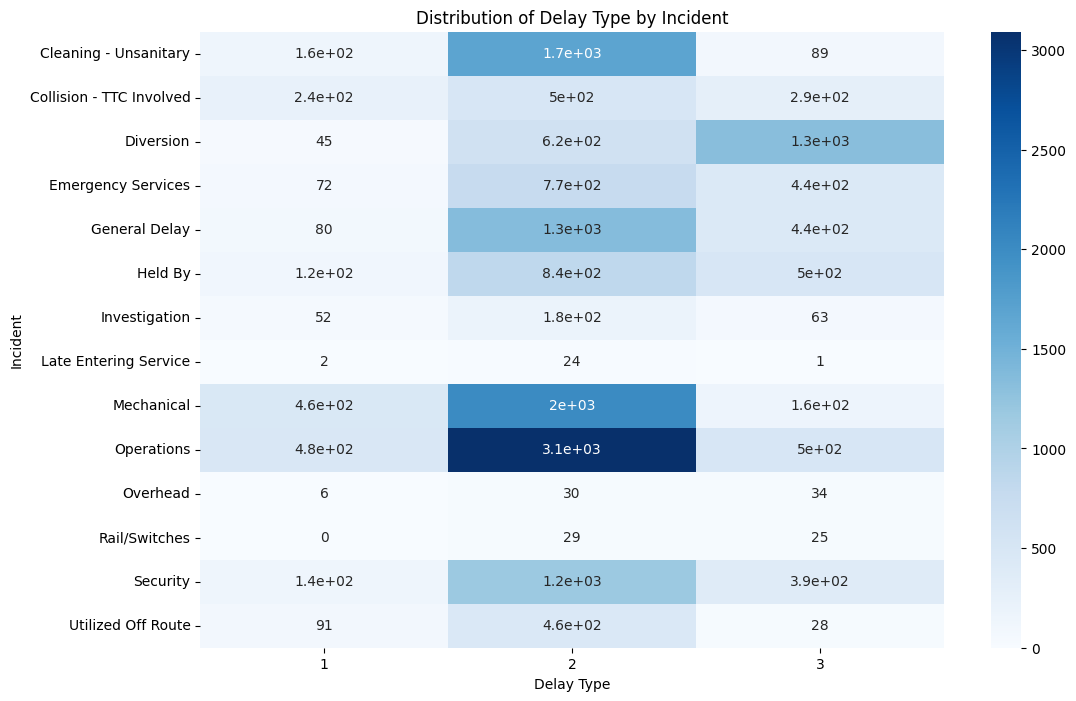

In [ ]:
# Analyzing the distribution of delayType for the top feature: incident
incident_delay_type = df_cleaned.groupby(['incident', 'delayType']).size().unstack().fillna(0)

# Heatmap for Incidents
plt.figure(figsize=(12, 8))
sns.heatmap(incident_delay_type, annot=True, cmap='Blues')
plt.title('Distribution of Delay Type by Incident')
plt.xlabel('Delay Type')
plt.ylabel('Incident')
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



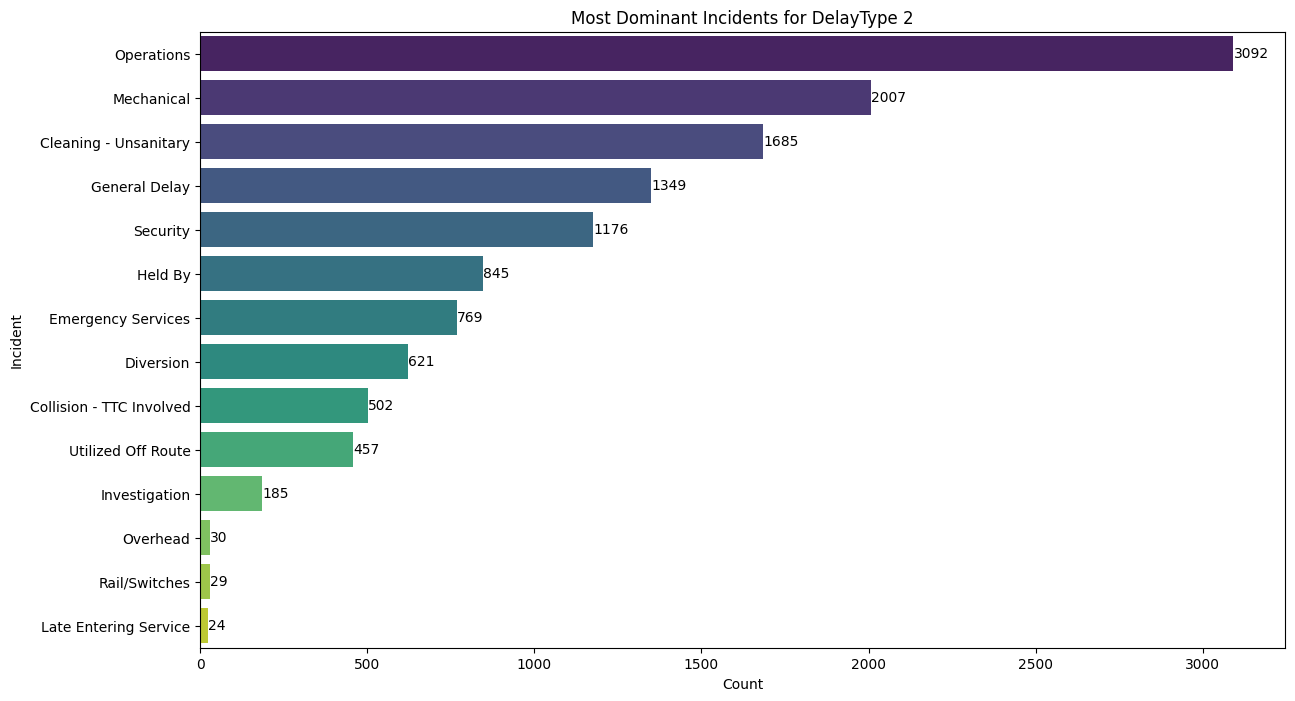

In [ ]:
# Filter the DataFrame for delayType 2
delayType_2 = df_cleaned[df_cleaned['delayType'] == 2]

# Group by 'incident' and count the occurrences
incident_counts = delayType_2['incident'].value_counts()

# Create a DataFrame for better visualization
incident_rankings = incident_counts.reset_index()
incident_rankings.columns = ['Incident', 'Count']

# Sort the DataFrame by count in descending order
incident_rankings = incident_rankings.sort_values(by='Count', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Count', y='Incident', data=incident_rankings, palette='viridis')

# Annotate the bar plot with the count values
for index, value in enumerate(incident_rankings['Count']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')
plt.title('Most Dominant Incidents for DelayType 2')
plt.xlabel('Count')
plt.ylabel('Incident')
plt.show()

**Observation:**

- **Delay Type 2 (normal delay,  6 - 15 minutes)**: The incident **Operations** is most dominant for the Expected Delay Type, followed by **Mechanical**, **Cleaning - Unsanitary**, **General Delay** and **Security** in this order.

<center>

### **2. Vehicle**

</center>

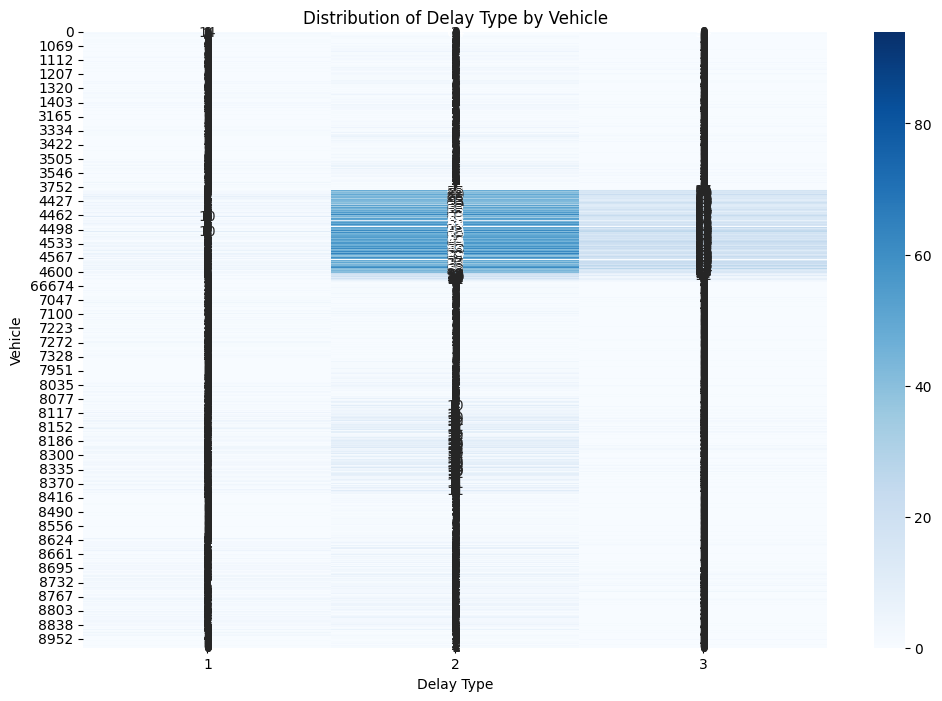

In [ ]:
# Heatmap for Vehicles:
vehicle_delay_type = df_cleaned.groupby(['vehicle', 'delayType']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(vehicle_delay_type, annot=True, cmap='Blues')
plt.title('Distribution of Delay Type by Vehicle')
plt.xlabel('Delay Type')
plt.ylabel('Vehicle')
plt.show()





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



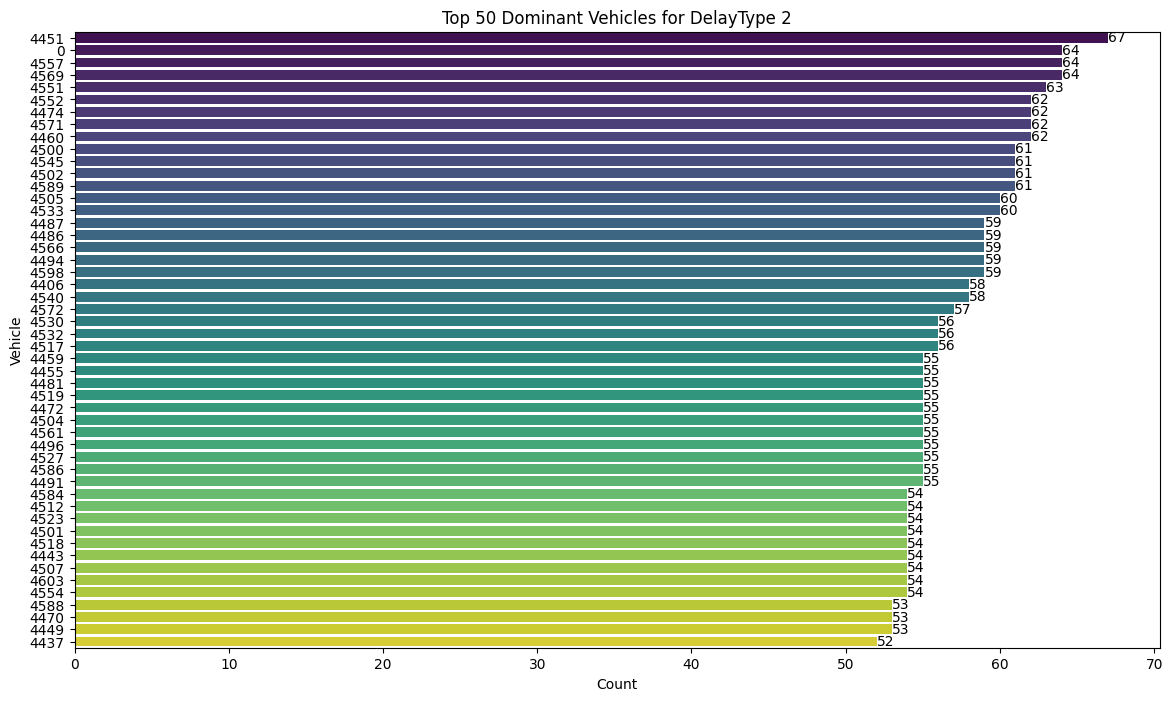

In [ ]:
# Plotting the top 50 dominant vehicles for delayType 2: 

# Filter the DataFrame for delayType 2
delayType_2 = df_cleaned[df_cleaned['delayType'] == 2]

# Group by 'vehicle' and count the occurrences
vehicle_counts = delayType_2['vehicle'].value_counts()

# Create a DataFrame for better visualization
vehicle_rankings = vehicle_counts.reset_index()
vehicle_rankings.columns = ['Vehicle', 'Count']

# Sort the DataFrame by count in descending order and get the top 50 vehicles
top_vehicles = vehicle_rankings.sort_values(by='Count', ascending=False).head(50)

# Plotting the bar plot for top 50 vehicles
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Count', y='Vehicle', data=top_vehicles, palette='viridis')

# Annotate the bar plot with the count values
for index, value in enumerate(top_vehicles['Count']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

plt.title('Top 50 Dominant Vehicles for DelayType 2')
plt.xlabel('Count')
plt.ylabel('Vehicle')
plt.show()

**Observation:**

- **Delay Type 2 (normal delay, 6 - 15 minutes)**: The vehicles with the **prefix 44, 45, 46** significantly dominate the Expected Delay Type. Therefore, TTC can further examine these vehicles for pre-emptive actions. 


<center>

### **3. Location**

</center>

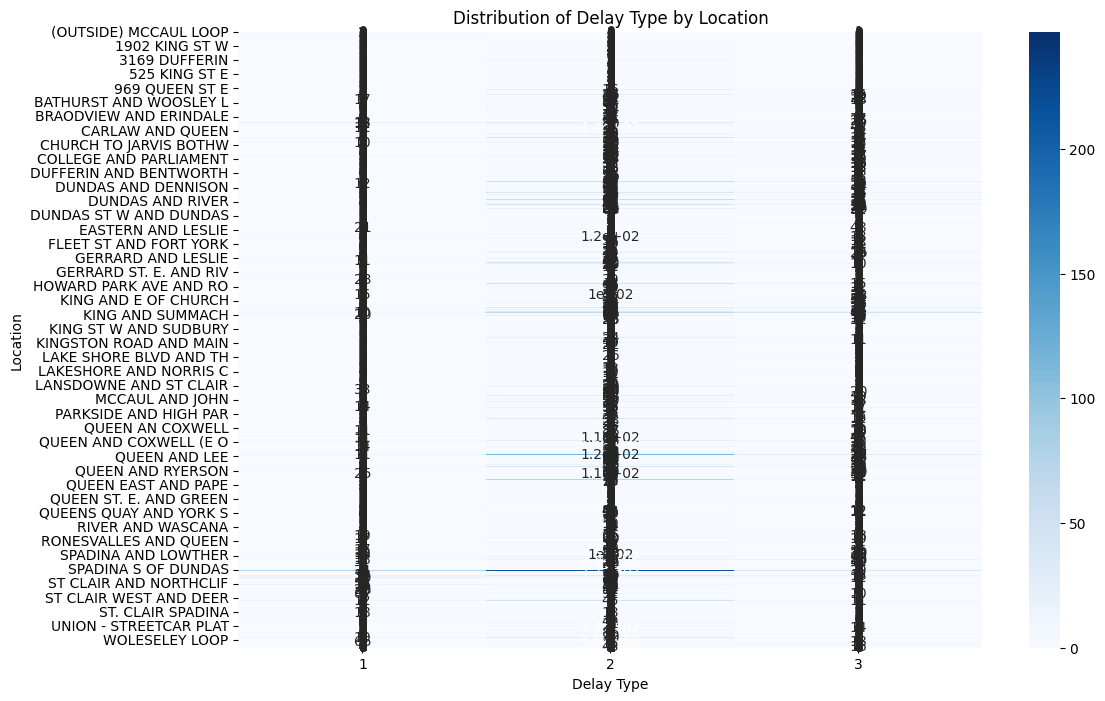

In [ ]:
# Heatmap for Location
vehicle_delay_type = df_cleaned.groupby(['location', 'delayType']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(vehicle_delay_type, annot=True, cmap='Blues')
plt.title('Distribution of Delay Type by Location')
plt.xlabel('Delay Type')
plt.ylabel('Location')
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



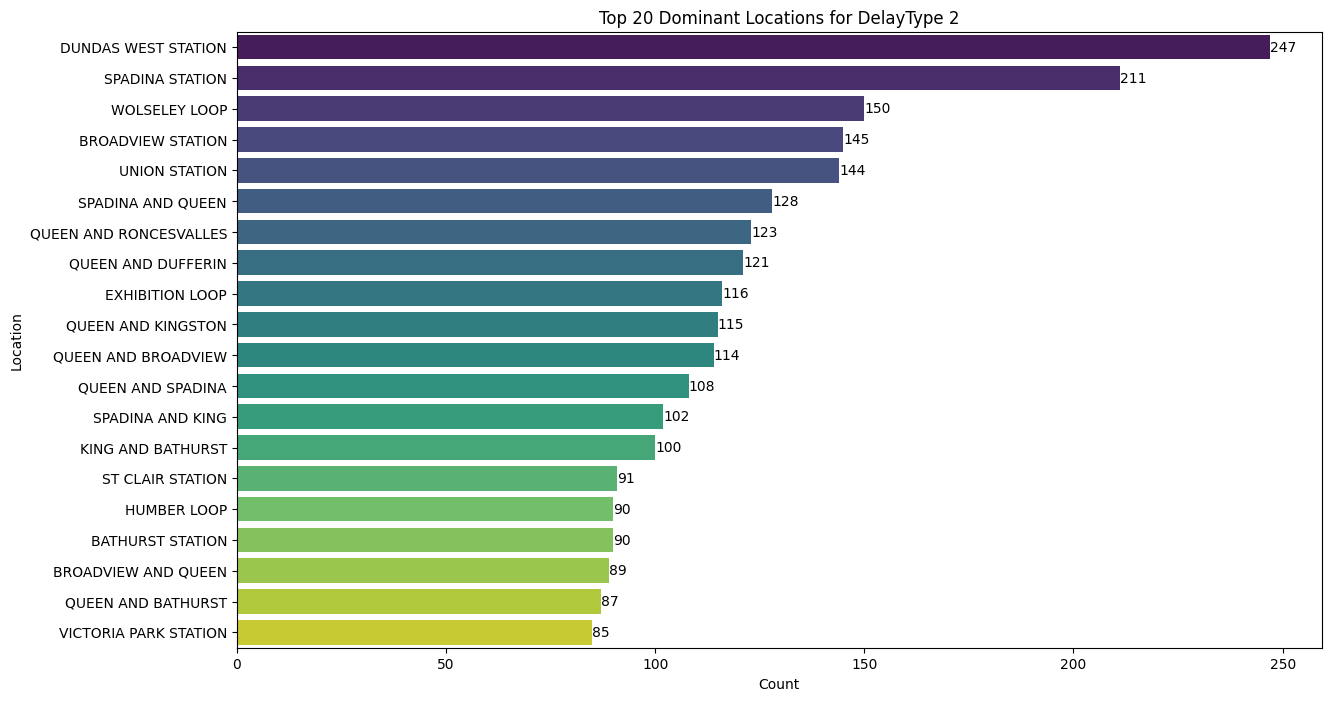

In [ ]:
# Plotting the top 20 dominant locations for delayType 2: 

# Filter the DataFrame for delayType 2
delayType_2 = df_cleaned[df_cleaned['delayType'] == 2]

# Group by 'location' and count the occurrences
location_counts = delayType_2['location'].value_counts()

# Create a DataFrame for better visualization
location_rankings = location_counts.reset_index()
location_rankings.columns = ['Location', 'Count']

# Sort the DataFrame by count in descending order and get the top 20 locations
top_locations = location_rankings.sort_values(by='Count', ascending=False).head(20)

# Plotting the bar plot for top 20 locations
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Count', y='Location', data=top_locations, palette='viridis')

# Annotate the bar plot with the count values
for index, value in enumerate(top_locations['Count']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

plt.title('Top 20 Dominant Locations for DelayType 2')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

**Observation:**

- **Dundas West Station** and **Spadina Station** have most influence on the **Delay Type 2 (normal delay, 6-15 minutes)**. Therefore, TTC can further examine these 2 locations for pre-emptive actions. 

<center>

### **4. Line**

</center>

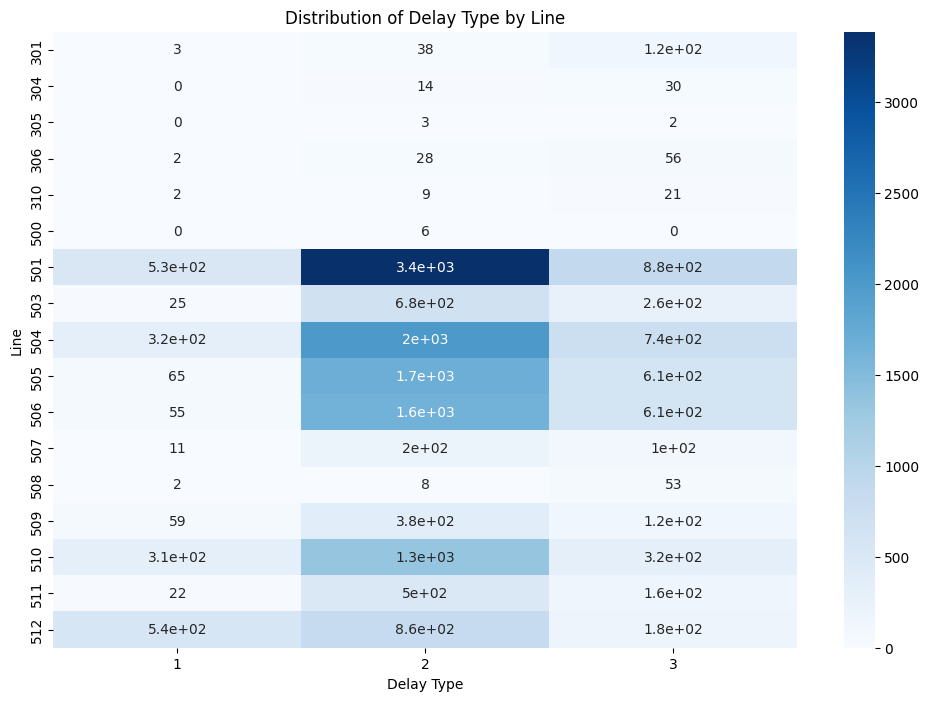

In [ ]:
# Heatmap for Line (Route)
vehicle_delay_type = df_cleaned.groupby(['line', 'delayType']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(vehicle_delay_type, annot=True, cmap='Blues')
plt.title('Distribution of Delay Type by Line')
plt.xlabel('Delay Type')
plt.ylabel('Line')
plt.show()






Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



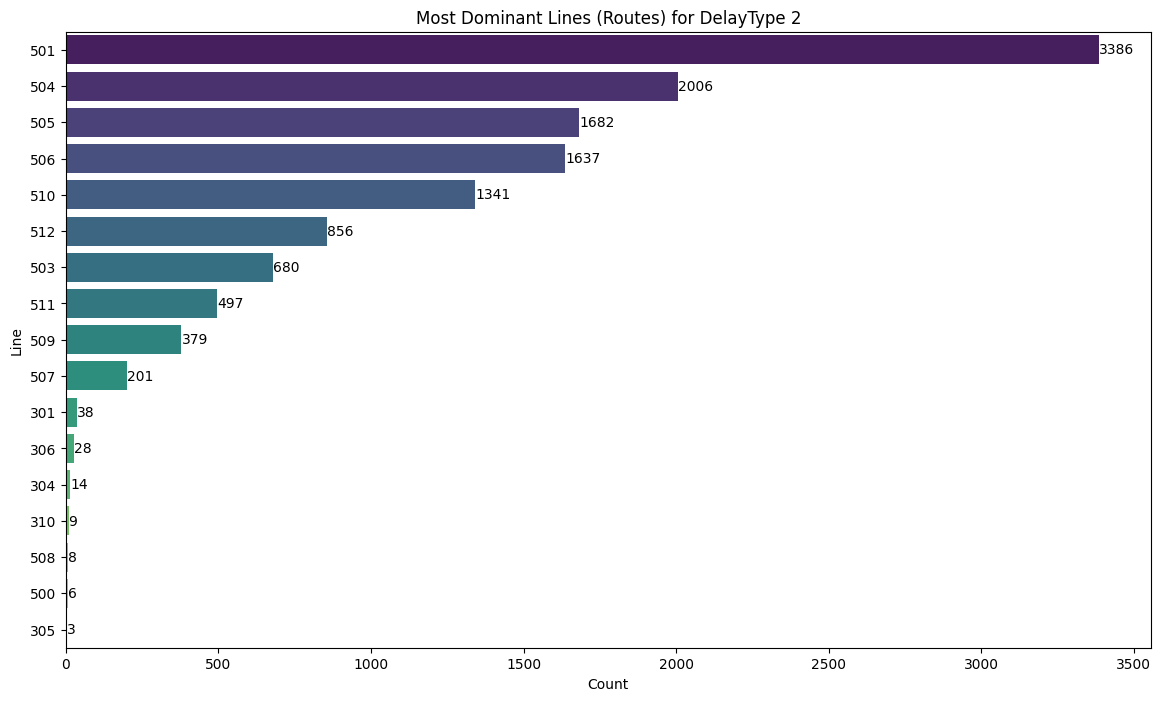

In [ ]:
# Filter the DataFrame for delayType 2
delayType_2 = df_cleaned[df_cleaned['delayType'] == 2]

# Group by 'line' and count the occurrences
incident_counts = delayType_2['line'].value_counts()

# Create a DataFrame for better visualization
incident_rankings = incident_counts.reset_index()
incident_rankings.columns = ['Line', 'Count']

# Sort the DataFrame by count in descending order
incident_rankings = incident_rankings.sort_values(by='Count', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Count', y='Line', data=incident_rankings, palette='viridis')

# Annotate the bar plot with the count values
for index, value in enumerate(incident_rankings['Count']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')
plt.title('Most Dominant Lines (Routes) for DelayType 2')
plt.xlabel('Count')
plt.ylabel('Line')
plt.show()

**Observation:**

- **Line 501** has the most influence on the **Delay Type 2 (normal delay, 6-15 minutes)**, followed by **lines 504, 505, 506 and 510**. Therefore, TTC can further examine these lines for pre-emptive actions. 

---

<center>

## Conclusion

</center>



- Based on this analysis of the TTC Streetcar Delay datasets years 2023 and 2024: the **Expected Delays (6-15 minutes)** is the most frequently encountered delay type in the TTC streetcar system with 67% of all cases. 

- The primary contributing factors are related to specific **incidents**, **vehicles**, **locations**, and **lines**. Most notably, operational and mechanical issues significantly impact delay times, especially on **lines** like **501**; and **vehicles with prefix 44, 45, 46**; and at specific locations such as **Dundas Street West** station and **Spadina** station.

- The most dominant incidents for delay type 2 highlights "**Operations**" and "**Mechanical**" **as the major contributors** for frequent delays (6-15 minutes). Secondary contributors include "**Cleaning - Unsanitary**" and "**General Delay**". This implies that a significant number of delays can be mitigated by improving operational planning, fleet maintenance, and cleanliness standards.


**Recommendation:**

   To improve the efficiency and reliability of the TTC streetcar service, a targeted strategy focusing on:
- **Reducing Operations and Mechaninical issues**: Conducting maintenance and monitoring more frequently for **vehicles with prefix 44, 45, 46**.  
- **Focus on High-Impact Routes and Locations**: Addressing issues specifically on **lines 501, 504**, and **locations** like **Dundas Street West** and **Spadina**.
  
   These focused actions can reduce the frequently experienced delays (6-15 minutes), and enhance the overall experience for TTC streetcar passengers.





---
---